# A Whirlwind Tour of Python

## Why?

  * Many ML frameworks in use today are Python-based.
  * In general, tasks around "ML model definition" are usually done in Python.
  * When a trained ML model gets deployed in a product, Python will in
    general not be involved.

## Objective of this Lecture

  * Give a reasonably solid overview over the skeletal structure of the Python
    programming language.
    * "These are the basic ideas and principles"
    * "Authoritative documentation is over there"
    * "Extension Modules/Libraries are documented here"
    * General principle: To the extent we can do this given constraints,
      we will always reference the authoritative sources of truth for
      information about Python (rather than merely presenting examples).
  * Explain basic design decisions underlying the language.
  * Gain some familiarity with one particular Python execution environment
    that is useful for experimenting - Google Colab Notebooks.

  

## Colab Notebooks

This document is a Google colab notebook. Much of this course will be notebook-based, since such notebooks are a UI concept many physicists (and data analysts) are already familiar with.

What are we seeing here? The current file is a document on Google Drive cloud storage (linked to a @gmail.com or @google.com account) that is an "interactive Python notebook" - it can be downloaded as such, using the menu (and re-uploaded again). It can also be downloaded as a .py Python file. This loses some information about text cells and their formatting. Also, Colab notebooks have some limited (single-file) version tracking capabilities, to explore questions such as "what did I change over the past 24 hours in this file?"

A Colab Notebook can be connected to a "Colab Runtime". Basically, this is an (emulated) Linux machine in the cloud that can execute "Interactive Python" (IPython) commands. The IPython interpreter will forward lines of code that start with an exclamation mark (!) to the shell - so we can indeed run shell code on the runtime Virtual Machine (as a root-user!).

In [ ]:
!head -n 20 < /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid


In [ ]:
!echo "### Disk Usage ###"
!du -h .
!df -h
!echo "### Linux System RAM ###"
!head -n 10 < /proc/meminfo
# The UI also shows ram/disk information about the connected runtime system
# in the top right corner.

### Disk Usage ###
72K	./.config/logs/2023.08.14
76K	./.config/logs
8.0K	./.config/configurations
120K	./.config
55M	./sample_data
55M	.
Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   27G   82G  25% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  887M  55% /usr/sbin/docker-init
tmpfs           6.4G  360K  6.4G   1% /var/colab
/dev/sda1        44G   28G   16G  65% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
### Linux System RAM ###
MemTotal:       13294252 kB
MemFree:         8461152 kB
MemAvailable:   12071020 kB
Buffers:           98472 kB
Cached:          3672952 kB
SwapCached:            0 kB
Active:           910260 kB
Inactive:        3608388 kB
Active(anon):       1324 kB
Inactive(anon):   747552 kB


The underlying runtime is a (modified) Debian GNU/Linux system.

We can install extra packages if we want to.

Runtime systems are allocated when we start a colab and get de-allocated if they remain idle for too long.

There of course are some "terms and conditions" around what colabs can and can not be used for. These can be found at: [https://colab.research.google.com/pro/terms/v1](https://colab.research.google.com/pro/terms/v1).


Many relevant packages are pre-installed here, but let us install some extra
Debian packages and also some extra Python packages which we will need further down in this specific notebook.

In [ ]:
!apt install clisp # A Debian package
!pip install lark # A Python package
# (Output below is from a 2nd run; these install commands are idempotent
#  apart from producing lengthy output when installing a package.)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clisp is already the newest version (1:2.49.20210628.gitde01f0f-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


## Python - Some History



  * Crude but useful model: There are two complementary approaches
    to "computing": machine-oriented vs. maths-oriented.
    * Machine-oriented school: Focus on Turing machines,
      Knuth's "MIX Assembly", etc.
    * Maths-oriented: "What primitives do we need to meaningfully
      talk about algorithms?"
      * "Term evaluation" and "function application"
        can take us very far.
      * (This needs a suitable notion of "function" ~ computation specification.)
      * "More recently" also of importance (~since 1970+):
        Concepts from category theory.
        
        Especially: those related to "algebraic data types" and
        "composition operations".

  * Modern ML is closely related to AI.
    * Historically, much of AI-related work since the 1960s has been done in LISP.
    * LISP follows the "maths-oriented" approach to computation.
    * Looking at the core language (sans libraries), many LISP systems
      are still more powerful than Python. Python became popular due to
      "being more accessible".
    * LISP's blessing and curse is its simplicity:
      * One uniform approach to express structured data:

        "Structure is generally built out of pairs" (called 'cons cells').
      * Programs are also directly written down as syntax trees!
      * A minimal LISP-like system:
        * Key atoms: "symbols" ("name tags" that provide "identity")
          and numbers.
        * "Pairs", written as `(left . right)` with extra rule
          "if a dot precedes a '(', we need not write the dot and the
          parentheses around the expression to its right".
        * "Evaluation rules" for "evaluating an expression specified as a tree".
       
        * Some built-in function definitions, like the functions `abs`, `+`, etc.
        * Most important non-function elements:
          "if"-conditional and "define-a-function-that-evaluates-this-term".

      * Lisp code, like sheet music, "looks alien to the un-initiated".
        * Entry barrier!
        * Requires discipline!
        * (...but great experience once mastered, due to structural
          simplicity bringing enormous flexibility).
      * Two of the three currently most popular programming languages conceptually are effectively LISP systems "with some syntax sugar on top to lower the entry barrier": [JavaScript](https://thenewstack.io/brendan-eich-on-creating-javascript-in-10-days-and-what-hed-do-differently-today/) and [Python](https://norvig.com/python-lisp.html#sample).

### Python vs. Lisp

We will have to say more about Python-vs-Lisp when we discuss the TensorFlow2 evaluation model. Here, we only have time for a quick - but important - first glimpse.

In [ ]:
# This Python notebook Code cell
# - defines a multi-line string that contains some LISP code.
# - writes that LISP code to a file.
# - executes a LISP interpreter on that code.
# - Also contains a Python function that closely corresponds to the
#   LISP function in this file, for syntax comparison.

lisp_code_1 = """
(defun print-multiplication-table (n)
  (loop for i from 1 to 10
   do (format t "~2d x ~2d = ~2d~%" n i (* n i))))
"""

with open('/tmp/mt.lisp', 'wt') as h_out:
  h_out.write(lisp_code_1)
print('=== LISP ===')
!clisp -q -x '(load "/tmp/mt.lisp")' -x '(print-multiplication-table 7)'

###

def print_multiplication_table(n):
  for i in range(1, 11):
    print('%2d x %2d = %2d' % (n, i, n * i))
print('=== Python ===')
print_multiplication_table(7)



=== LISP ===
;; Loading file /tmp/mt.lisp ...
;; Loaded file /tmp/mt.lisp
#P"/tmp/mt.lisp"
 7 x  1 =  7
 7 x  2 = 14
 7 x  3 = 21
 7 x  4 = 28
 7 x  5 = 35
 7 x  6 = 42
 7 x  7 = 49
 7 x  8 = 56
 7 x  9 = 63
 7 x 10 = 70
NIL
=== Python ===
 7 x  1 =  7
 7 x  2 = 14
 7 x  3 = 21
 7 x  4 = 28
 7 x  5 = 35
 7 x  6 = 42
 7 x  7 = 49
 7 x  8 = 56
 7 x  9 = 63
 7 x 10 = 70


The similarities between Python's "def print_multiplication_table"
and the LISP "defun print-multiplication-table" are quite evident.

However, the LISP code is merely a tree of symbols (and numbers and a string)
that could equivalently be written as:

```
(defun . (print-multiplication-table . ((n . ()) . {...})
```

Here, indentation is purely arbitrary, and we used a single simple(!) rule
to elide "spurious" parentheses.

For the Python code however, indentation carries meaning (like in Haskell).
While LISP code generally is described as "having many parentheses",
every LISP hacker reads and writes code by-indentation, and Python merely
makes indentation carry actual meaning.

*Participant Exercise*: How many parentheses do we count in the Python
and LISP definitions of the multiplication-table function?


# Understanding Python

As for just about every programming language, understanding its structure and interpretation requires a solid understanding of three core aspects:

 * The Syntax
 * The "Data Model"
 * The "Execution Model"

## Python Syntax


While in LISP, one directly specifies an arithmetic expression as a tree, such as `(+ 2 (* 3 4))` ("the sum of 2 and (the product of 3 and 4)"), Python uses a dedicated software component that translates source code to an internal "syntax tree representation". This is the job of a "Parser".

Generally speaking, almost all programming languages use a "parser" to process source code, but such parsers are basically never written by hand. Rather, there are programs that take as input a grammar-specification (itself "a kind of program") and produce the code for a parser that processes input following this grammar.

### Mathematical term grammar

Common mathematical notation also has a grammar - and the grammar of most programming languages mostly is an extension of that grammar. This term-grammar is generally introduced/discussed in 5th/6th grade mathematics, with a typical exercise of the form:

```
Translate the term `5+(7+9)/2` into structured form.
```

The expected answer being:

```
  * This term is a sum.
    * The 1st summand is the number 5
    * The 2nd summand is a quotient.
      * The numerator is a parenthesized term.
        * This term is a sum.
          * The 1st summand is the number 7.
          * The 2nd summand is the number 9.
      * The denominator is the number 2.
```

This "structured form" is, of course, a tree (...which we could write in LISP tree notation). Let us actually write a parser for such a simplified term grammar, using a grammar and a parser-generator (the one provided by the "lark" Python module, which we installed and imported earlier).


In [ ]:
import lark

# EBNF (Extended Backus-Naur Form) grammar, see:
# https://en.wikipedia.org/wiki/Extended_Backus%E2%80%93Naur_form
# https://lark-parser.readthedocs.io/_/downloads/en/latest/pdf
grammar = """
?start: sum

?sum: product
    | sum "+" product  -> add
    | sum "-" product  -> sub

?product: factor
    | product "*" factor -> mul
    | product "/" factor -> div

?factor: NUMBER -> num
    | "(" sum ")"

NUMBER: /[+-]?[0-9]+/
"""

parser = lark.Lark(grammar)

print(parser.parse("7"))
# Prints:
# Tree('num', [Token('NUMBER', '7')])

print('======')

print(parser.parse("1+2"))
# Prints:
# Tree('add', [Tree('num', [Token('NUMBER', '1')]), Tree('num', [Token('NUMBER', '2')])])

# There also is pretty-printing for parsed trees:
print('(pretty-printed form)')
print(parser.parse("1+2").pretty())

def show_pretty(term):
  return '=== {} ===\n{}'.format(term, parser.parse(term).pretty())

print('======')

print(show_pretty("2+3*(4+5)"))
# Further examples:
# print(show_pretty("7*8*9/10"))
# print(show_pretty("2*3-4*5*6-7*8"))
# print(show_pretty("1+1/(1+1/(1+1/(1+1)))"))



Tree('num', [Token('NUMBER', '7')])
Tree('add', [Tree('num', [Token('NUMBER', '1')]), Tree('num', [Token('NUMBER', '2')])])
(pretty-printed form)
add
  num	1
  num	2

=== 2+3*(4+5) ===
add
  num	2
  mul
    num	3
    add
      num	4
      num	5



### Python's Grammar

Python's (and most other programming languages') grammar can be seen as a massive expansion of the commonly used grammar for mathematical terms. Here and in languages such as C, Java, etc that can be (mostly) parsed with a grammar, the typical extensions are:

  * We have many more binary operators beyond the arithmetic ones,
    `+, -, *, /, {** or ^}`. Typically, there also is
    `<<, ~, &, %`, plus quite a few more.
  * There are both "expressions" (which evaluate to a value,
    so "generalized mathematical terms"), and also "statements"
    which "describe instructions", and then there also is a notion of a
    "block of statements" - which are executed one-after-another.
  * In some languages (including Python), "expressions" (which have a value)
    are a special kind of statements.

The Python language's full grammar specification can be found at: [https://docs.python.org/3/reference/grammar.html](https://docs.python.org/3/reference/grammar.html). This then in particular settles questions such as what the specific role of a pair of round parentheses is in a piece of code, what operators there are, how operator precedence works, and what the keywords in the language are. Naturally, the grammar has some hierarchical structure, there is a sub-grammar for expressions sitting inside it, for example.


Going forward, we will occasionally come back to the Python grammar and associated documentation for authoritative answers about how code is interpreted.

As far as Python is concerned, the Python code we write first gets transformed into a tree representation. The parser that does this (or rather, an equivalent one) is also available as a Python module, in the `ast` (Abstract Syntax Tree) package. In LISP, we would directly have written that tree ourselves.

The most important statements we will have to know about are:

  * Expressions (= statements that have a value).
  * Import statements. These load a "module" / "software library"
    (which must be installed on the (virtual) machine):
    * `import numpy`
    * `import tensorflow as tf`
    * `from scipy import optimize as sopt`
  * Assignments
    * At the "semantics" level, we need to discriminate between assignments
      that introduce a new variable and assignments that change
      the value of a variable.
    * Unlike in C, assignments do not have a value, but the grammar
      nevertheless allows us to chain them, as in `a = b = 0`.
    * The thing on the left hand side must designate some place that
      can hold a value. Destructuring is supported. The thing on the right
      must be an expression that has a single value, or an assignment
      (for chaining).
    * Examples
      * `x = 2 + 3 + f(y)`
      * `somelist[0] = foo.x = y = 7`
      * `(x, y, z) = (10, 20, 30)`
      * (...we will see quite a few more handy things in code examples later...)
  * Function Definitions
    * There are both "named functions" and "unnamed functions".
    * A named function definition is a statement. Example:
      ```python
      def squared(x):
        return x*x
      ```
      The form is:
      ```
      def {name}({...parameters...}):
        """ ... optional docstring ... """
        body_statement
        ... optionally, more body statements ...
      ```
    * Reaching a `return` statement exits the function,
      returning the value after `return`, if such a value given.
    * Reaching a bare `return` statement, or reaching end-of-body
      makes the function return the special value `None`.
    * "unnamed functions" / "lambda functions" are introduced as
      function-valued expressions of the form
      `lambda {parameters}: {expression}`.
      
      So, we can do `squared = lambda x: x*x`.
      The body is an expression, not a statement.
      There is no `return` here.

* Conditionals and loops.
  * `if/for/while`/`break/continue`
  * In time, we will see examples.
  * Surprisingly, these are less frequent/relevant
    in Python than many other languages, since
    "there often is a better way to do it".
* Exception handling
  * `try/except/finally` - only play a side role in this course.

* Class definitions
  * This basic course will mostly try to circumnavigate having to define classes. Pragmatically, object-orientation is much about preventing authors from using global definitions for state-management - i.e. making state-management local by having parts of the relevant program-state (divided up in a meaningful way) be owned by different class instances ("objects") and manipulated through clearly defined pathways ("instance methods"). Often, a superior approach to state-management is *avoiding the need to manage state in the first place* - such as by focusing on designing programs in terms of data-transformations. In maths-heavy use cases (including Machine Learning), many relevant objects "have value semantics" - loosely, "behave in some sense like numbers", i.e. may have components akin to how a fraction has a numerator and a denominator, but should not be thought of as having any mutable properties - and this automatically does away with much of the need for state-management. The one place where we will obviously encounter stateful objects is in "trainable" components of a machine learning model. "Model training" is all about tweaking their internal state-parameters in a way that improves performance.


## Python's "Data Model"


Python's Data Model in many ways resembles Common Lisp's, but its implementation resembles Perl more than any LISP system.

### Key Aspects

  * Variables are names that reference an in-memory value (or "object").
    We must distinguish between the `name` (variable) and the value
    that is being referred to by a name. The variable is in itself not
    really an object, and there is only one situation where a variable
    shows up as a stateful ("container-like") entity.

  * Every value in Python is an object in memory and has a memory address.

    These addresses are generally "hidden behind the scenes", we normally
    do not have to concern ourselves with these.

    The CPython interpreter actually exposes these addresses via the `id(.)`
    function. For every `x`, the value of `id(x)` is an integer such that
    `id(x) == id(y)` holds if and only if the variables `x` and `y`
    name the same in-memory-object. (If an object gets reclaimed after
    becoming provably-unreachable, a different object can have the same
    `id` later.)

  * Every in-memory value/object has a clearly defined type.
    This type is a value/object itself, a "class object".
    The function `type(.)` maps an object to its type(-object).

  * Terminology:
    * A `type` is the same as a `class`.
    * A class can be a "subclass" of other classes defined earlier.
    * "Is subclass of" is generally considered to be a reflexive(!)
      and transitive property, so, the term "subclasses of X"
      generally refers to the entire class hierarchy tree rooted at
      and including X.
    * If the type of an object `o` is `t`, then "`o` is an instance (a "class instance") of `t`", and also, if `t` is a subclass of `t0`, then `o` also is an instance of `t0`.
    * The `issubclass(t, t0)` function checks whether `t` is a (not necessarily proper) subclass of `t0`. Hence, `issubclass(type(x), type(x))` always evaluates to `True`, for every object `x`.

### Important Types/Classes

Here, we are takling exclusively about the "dynamic types", the ones obtained by `type(.)`.

There also are "static type annotations", but we do not talk about these anywhere in this course.

  * The type `int`.
    * Arbitrary-size integers (since Python3).
    * Literals (examples): `-5`, `100`, `1_000_000`, `0xff`.
  
  * The type `bool`.
    * Subclass of `int`.
    * Literals: `True`, `False`.
    * Cannot be subclassed.
      This guarantees that `issubclass(type(x), bool)` implies
      `x is True or x is False` - there can only be these exact two
      in-memory objects of this type.
    * Used as an integer, `True` is equivalent to 1, and `False` is
      equivalent to 0, so (for example) `True + True = 2`.

  * The type `float`.
    * IEEE-754 "binary64" floats.
    * Literals (examples): `1.23`, `-4.567e-12`.
    * "As everywhere else": 64-bit signed floating point numbers with just shy
      of 16 valid decimal digits. Valid exponents in decimal include the range
      (-300..300) and extend a little bit beyond that. There is minus-zero,
      positive-infinity, negative-infinity, and not-a-number. not-a-number
      is not equal to itself.
    * Note: `1.0/0.0` does not evaluate to float-infinity `float("+inf")`.
      Rather, evaluating this expression raises a `ZeroDivisionError`.
    * Related type: `complex`: pair of binary64 floats representing
      real and imaginary part of a complex number.

  * The type `NoneType`.
    * There is only one in-memory object of this type.
    * Literal: `None`.
    * Cannot be subclassed.
    * Generally used in many Python APIs as a
      "poor man's substitute to express 'value can be missing'",
      but "category-theory-wise botched".
    * Terminology: in documentation, "an optional int" means:
      "this is an int instance, or the value `None`".
      (Likewise: "an optional string", etc.)
      Design problem: There is no sound notion of "an optional X"
      for arbitrary X, since "an optional optional int" does not work.

  * The types `str` and `bytes`.
    * Informally, `str` instances represent text (such as: Unicode text),
      while `bytes` instances represent sequences of 8-bit bytes.
    * Unlike C/Java/etc, there is no separate `character` type `char`.
      In Python APIs, characters are represented by length-1 strings.
    * Literals
      * str: `"abc"`, `'def'`, `'''ghijk'''`, `"""xyz"""`
      * bytes: `b"abc"`, `b'def'`, etc.
      * There are special-form literals such as raw-string literals
        for which the rules about how to interpret embedded backslashes
        are different.
      * Adjacent literals "get merged into one literal at parse time"
        (like in C or C++).
      * Indexable, and so technically "sequences".
        Iterating over a string iterates over its 1-letter-long substrings.
      * Closely related to `bytes`: `bytearray` - which we will not
        discuss here.
  
  * The type `tuple`.
    * Tuples are ordered sequences holding a finite number of
      (arbitrary-type) objects.
    * If `type(x) is tuple`, then `len(x)` is the number of elements
      of the tuple, and `x[0]` ... `x[len(x)-1]` refer to the elements
      of the tuple. *Index counting always starts at zero*.
    * Literals (examples): `()`, `(7,)`, `(1, True)`, `(1, (2, 5))`,
      `(1, -2.0, 7,)`,
      
      `(True, None, "foo", (2, 3.0), b"bar", bool)`.

    * There can be trailing commas.

      Syntax wart: a 1-tuple *must* be written with a trailing dot,
      since `(7)` would be a parenthesized expression that evaluates
      to the `int` instance `7`.
    * "Immutable" in the sense that they do not permit changing
      object-state by assigning to slots:
      `mytuple[0] = 7` will raise a `TypeError` exception.
    * "Addition" is overloaded on tuples to mean "concatenation"
      (similary for strings), so: `(1, 2) + (3, 4) => (1, 2, 3, 4)`.

  * The type `list`.
    * Like a tuple, a `list` is an ordered sequence holding a finite
      number of objects (which in principle can be arbitrary-type,
      but quite often will be homogeneous).
    * Lists "have internal state", we can change the contents of a list-object:
      * Clearing the list: `mylist.clear()`.
      * Replacing the k-th element: `mylist[5] = 7`.
      * Appending an element at the end: `mylist.append(10)`.

        (This uses "slack space" allocated in geometric progression,
        like C++'s `std::vector<T>`, so is amortized-O(1).)
      * (There are more object-state-mutating operations.)
    * These are not 'lists' in the LISP sense: Producing a new list
      from a given one that has one extra element at the front
      is an expensive operation with Python lists, but
      accessing the N-th element requires *constant* effort,
      rather than "O(N) effort".
    * Literals (examples): `[]`, `[1, 2, 3]`, `[(1, True), (2, False)]`,

      `[None, [1, 2, 3], None, [4, 5], None]`.

    * Since we can assign to lists, we can make a list "contain itself":
      `xs = [None, 7]; xs[0] = xs`.
      
      General principle: Having objects for
      which traversing their components can get us back to the original
      object is technically possible in Python, but really really should
      always be avoided! (LISP does not have much of an issue here.)

  * The type `range`.
    * Represents a range of integers that has a length, a range,
      a start-value, and a step size.
    * Conceptually, behaves a lot like a length-k tuple of integers
      with constant spacing, but is more efficient to represent in memory,
      iterate over, etc.
    * Example: `range(0, 10, 1)` is the range of integers starting
      at 0 (inclusive), ending at 10 (exclusive), with step size 1.

      The common short-hand here is `range(10)`. (Common convention
      throughout: start-indices are inclusive, end-indices exclusive.)

  * The types `set` and `frozenset`.
    * Both set- and frozenset-instances represent unordered
      collections of different objects.
    * Instances of `set` have mutable state, so can be changed
      (adding/deleting elements). Instances of `frozenset` are immutable.
    * Constraint: Elements of `set` and also `frozenset` must not be mutable,
      unless they "define equality in terms of identity".
      This course: no sets/frozensets with mutable-state elements!
    * Set literals (examples): `{1, 2}`, `{(5, 6), (7, 8)}`.
    * Syntax wart: This is not an empty set, but an empty dict(ionary):
      `{}`. As for other types, we can get an "empty/zero/neutral value"
      by calling the type-object with no parameters: `set()`.
    * Frozenset examples: No literals, but can create frozensets
      by calling `frozenset` with an arbitrary collection as a parameter:
      `frozenset([1, 2, 3])`, `frozenset({"abc", "ghi"})`, `frozenset(range(7))`
    * Caution: This does not work (`1` is not a collection): `frozenset(1)`.

      This might do something unexpected: `frozenset('cat')`
      (evaluates the same way as: `frozenset(['a', 'c', 't'])`).

  * The type `dict`.
    * Table of key-value pairs, "with fast access", mostly corresponds to
      C++ `std::unordered_map<K, V>`, or Java `HashMap<K, V>`, but technically,
      neither keys nor values need be type-homogeneous.
    * Mutable, has state, we can add and delete entries.
    * For keys, the same rules apply as for set-elements.
      Unlike JavaScript and Perl, keys need not be strings,
      can be complex objects.
    * When used as a collection, mostly treated like the collection of its keys.
    * Literals (examples):
    
      `{"A": 1, "a": 1, "B": 2, "b": 2}`,
      
      `{3: 9, -3: 9}`,

      `{(1, 2, 3): (3, 2, 1), (5, 6): (6, 5)}`.

  * The type `function` - and the abstract base class `Callable`.
    * Functions that map input-parameters to output-values.
    * There are different types of function-like objects:
      * built-in functions
      * user-defined functions
      * class instance methods
      * class methods
      * instances of classes implementing a `__call__` method

      These all are instances of the abstract base type
      `collections.abc.Callable`.
    * More about them later.

  * The type `type`.
    * Instances of the type `type` are type-objects,
      such as `int`, `str`, `tuple`, `type`.
    * (See above): For many such type-objects, using them as callables with zero
      arguments evaluates to an 'empty' instance:

      `str() -> ""`, `int() -> 0`, `list() -> []`, etc.
    * Generally, we can introduce 'derivatives' of most such types, even `int`.
      (Some restrictions for types that only admit a fixed set of literals,
      like `bool`.)

  * The `numpy` (numerical Python) module's `numpy.ndarray` type.
    * Not a core Python datatype, but something introduced and owned
      by a (prominent, but still: entirely optional) library(/"module").

      Likewise, Python has no built-in "variable in a symbolic expression"
      data type, but modules like `sympy` provide that.
      (LISP would use a `symbol` here.)

    * The reference that describes the contracts in detail is:
      [https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

    * Name means "n-dimensional array", but as usual, we can save ourselves
      a lot of confusion if we consistently avoid language like
      "this 1-dimensional ndarray holds a 20-dimensional vector" or
      "this 2d array describes a 3d rotation".
      Much better: "this 1-index ndarray holds a 20-dimensional vector",
      respectively "this 2-index array describes a 3d rotation".
      (This convention unfortunately has not been adopted widely yet.)

    * TensorFlow's (and JAX's) tensors are closely modeled after
      `numpy.ndarray`.

    * General principle: Python (at least the CPython implementation)
      is a slow bytecode-interpreter. NumPy operations are executed by
      fast compiled and optimized numerical code.
      So, emulating something (like matrix multiplication) that can be
      done with NumPy operations through Python is generally not a good idea.

    * A useful basic and mostly-correct mental model:
      * instances 'under the hood' hold on to some block of memory with data
        (typically numerical data) in it, and provide extra bookkeeping which
        allows us to address this block of data in various ways, typically
        via indexing, using zero or more indices.
      * So, this naturally contains arrays with zero indices
        ("scalars", holding a single number), one index ("vectors"),
        two indices ("matrices"), etc.
      * Each such `ndarray` has a `size` (the number of elements),
        a "number of dimensions" `ndim` (misnomer - means: number of
        indices), and a `shape` (describing the range for each
        index), as well as a numerical data-type (`dtype`), and, of
        course, `data`.
      * numpy `ndarray`s are mutable: We can change data by assigning.
        (Not so for the "tensors" in ML frameworks - we will see why).
      * Example: we would naturally want to represent the 4x4x4x4
        numerical entries of the Riemann curvature tensor (ignoring
        all symmetry considerations) at a given spacetime event
        as a float [4, 4, 4, 4]-ndarray.
      * Example: a 800x600 RGB image might be represented as a
           [600, 800, 3]-ndarray with dtype=uint8 (1-byte integers in
           the range 0..255). If `imgdata` is such a `ndarray`, we would have:
           * `len(imgdata) == 600`
           * `imgdata.size == 600 * 800 * 3`
           * `imgdata.dtype == numpy.uint8`
           * `imgdata.shape == (600, 800, 3)`
           * `imgdata.ndim == 3`
      * Wart: if `a` is a numpy-ndarray, then it depends on whether `a`
        is a 0-index array or not whether we can iterate over it.
        For this reason, `ndarray` instances technically are not
        Python sequences (like lists or tuples), but nevertheless
        in many ways behave sequence-like.

      * Important operations with arrays include
        (we will encounter many examples later):
        * Indexing readjustments: slicing, striding, reshaping, etc.
        * "broadcasting" (generalization of
          "adding a vector to every row in a matrix").
        * "generalized Einstein summation" type operations.
        * Padding, tiling.
        * Nonlinear element manipulations (such as: clipping outlier values).


  * "Generator-Expressions" / "Iterators".
      * Just like `function` in Python is a subtype of `Callable`, these are all
        subtypes of a never-encountered-directly "abstract type"
        `collections.abc.Iterator`.
      * There are different specific such types,
        including e.g. dictionary-key-iterators.
      * These objects have internal state and behave like a tissue dispenser,
        only that they dispense Python objects: We can keep pulling objects
        from them, one after another, until they are exhausted. In particular, we can map and iterate over them.

      * Very important for doing computations on-demand.

Overall, generator expressions tend to show up all over the place with modern Python code. An important aspect to keep in mind is that they are stateful, so consuming a generator/iterator involves side effects. It is important to ensure that in Python code, reading the code could not ever lead to mistaken mental models about what side effects occur at execution time. This normally means that all side effects are expected to be documented. the state-changes that occur when consuming an iterator are a borderline-exception in the sense that these are typically not documented when it is obvious that items will be pulled from an iterator. However, this also generally means that if a generator/iterator gets passed to a callable that does not precisely specify how much the iterator will be advanced, it is not OK to keep using the same iterator-object post-call, for example by passing it on to another callable. An important callable that allows re-using its iterator-argument post-call is - obviously - the `next()` built-in function, which retrieves the next element and advances the iterator by one. This example shows different generator-"dispensers" for squares.

```
>>> squares = (x*x for x in range(1, 11))
>>> next(squares)
1
>>> next(squares)
4
>>> next(squares)
9
>>> type(squares)
<class 'generator'>
>>> list(squares)
[16, 25, 36, 49, 64, 81, 100]
>>> squares2 = (x*x for x in range(1, 11))
>>> list(squares2)
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
>>> all_squares = map(lambda x: x*x, itertools.count(1))
>>> next(all_squares)
1
>>> next(all_squares)
4
# ... could go on "forever" ...
# This is an equivalent form that uses generator-expression syntax:
>>> all_squares2 = (x*x for x in itertools.count(1))
```

### Other types

Python has many more built-in types, including somewhat esoteric ones such as
as `module`, `NotImplementedType`, `ellipsis`, various file-handle types, etc,
but we will not concern ourselves with most of these here.

One type that is somewhat relevant still is the type `object`. Every value is an instance of `object`, and every type is a subtype of `object`. (So, the `object`-type-value is an instance of the type `object`.)

### Exceptions

One important subclass hierarchy to be aware of however is rooted at the `Exception` class/type. Instances are typically used as an argument to a `raise` statement, which early-terminates a function in such a way that, rather than the function returning a value, in-process nested function calls will be aborted until a call frame is reached that handles the (error-like) exception.

A typical example is this code:

```
def is_valid_probability(p):
  """Returns whether `p` is a valid probability."""
  return 0 <= p <= 1  # chained-comparison, equivalent to: 0 <= p and p <= 1.


def bayesian_rule(p1, p2):
  """Combines independent probablities via Bayes's rule."""
  if not (is_valid_probability(p1) and is_valid_probability(p2)):
    raise ValueError('Both p1 and p2 need to be valid probabilities. '
                     f'Got: p1={p1!r}, p2={p2!r}')
  p12 = p1 * p2
  return p12 / (p12 + (1 - p1) * (1 - p2))  
```


## Python's "Execution Model"



A key principle for every programming language is "scoping", both in the concrete technical sense (see: [https://en.wikipedia.org/wiki/Scope_(computer_science)](https://en.wikipedia.org/wiki/Scope_(computer_science)), and in a generalized sense.

A basic problem is "Which context tells us what a particular named entity is referring to"? Unsurprisingly, this problem also exists in mathematics - and there are commonly accepted conventions that resolve all related ambiguities.

In mathematics, let us consider the following definition of the function
${\rm hypotenuse}(\cdot, \cdot)$:

$$
{\rm hypotenuse}(x, y)=\sqrt{x^2+y^2}
$$

Now, if we defined a function $g(x):={\rm hypotenuse}(x, 1)+{\rm hypotenuse}(1, x)$, we would all agree on the meaning of that definition, despite this definition of $g$ using a variable name (namely $x$) that also occurs in the definition of ${\rm hypotenuse}$. Properly formalizing the rules of such variable-substitutions and variable-binding is - however - not completely trivial.

Clearly, if we want to have "components supporting synthesis", then having some such rules that govern name-scoping is essential for building larger and more complicated units out of small units. (Just as in mathematics.)

There is basically one programming language where a conscious design decision was made to ignore such "synthesizability" considerations and go with a single flat namespace - "there is just one thing around that can be called $x$". This then naturally makes it increasingly hard to keep track of things the larger programs get - typically reaching un-manageability at about 1000 lines. That language is BASIC (specifically, the classic form of BASIC, Dartmouth BASIC pre-v6).

---

With code, there are basically three situations where such questions about "where is this named thing coming from" are relevant:

  * Lexical scope - meaning of variables inside functions.

    Example: This is the translation-operator
    (written with spurious parentheses for more clarity):

    `translated = lambda a: (lambda f: (lambda x: f(x-a)))`

    This is a specific translation: `shifted5 = translated(5)`.
    
    Questions such as "what provides the translation-parameter `a`
    in this `shifted5` function" are about "lexical scope".

  * Dynamic scope - meaning of context-parameters while some
    particular function is being evaluated.
    This is typically about resource management or some other
    implicit context we are referring to. "While we are still
    processing this function's body (and we might have stepped
    into evaluating some inner function), the term 'X' shall mean..."

    * In Python, dynamic scope (more commonly called "dynamic context")
      is typically handled by "context-manager objects" that
      "know how to 'enter' and 'exit' some context", and sometimes via
      `try/finally` blocks. The general idea is: "we need to
      close/drop/remove something as control flow leaves a block,
      no matter how" and "as long as the block is being processed,
      the to-be-closed/removed thing is available."

    * A common case is "writing data to a file":
      ```
      def write_record(filehandle, record):
        # ... writing data ...
        # (while this function-body here is being processed,
        # the file opened by the caller is open, and will
        # have to be closed even if an error arises here that
        # aborts further processing of the caller's function-body.)

      def write_all_records(filename, records):
        with open(filename, 'wt') as h_out:
          for record in records:
            write_record(h_out, record)
      ```

    * With TensorFlow1, there is (for example) a 'session-context' that
      provides the association with some hardware that can do a numerical
      calculation. With TensorFlow2, a "gradient-tape" is generally handled
      by such dynamic context.

  * "Attribute resolution" -
    "where does a particular property of an object come from"?

    * Example: The `Counter` class in the `collections` module
      is a subclass of `dict`. `collections.Counter([1, 1, 1, 2, 2]).items()`
      uses the `items` attribute provided by the `dict` superclass,
      but calling the `.most_common()` method uses the attribute provided
      by the `Counter` class.

    * Object-oriented programming is a lot about using class instances
      ("objects") as a systematic approach to state-management.
    
    * As explained earlier, for maths-oriented code,
      where the fundamental notions are related to
      "properties of value-to-value transformations", we can get quite
      far not concerning ourselves with OO at all - "since there is
      basically no state in need of management".
      (This will be mostly our perspective for this course.)

### How Python code gets executed

An early "caveat" is in order here: a TensorFlow2 `@tf.function` decorated function looks like Python code but actually is something very different. We will come back to that.

A basic working model of Python code execution is:

  * A `def xyz(...):` statement introduces a variable `xyz` whose value
    is a callable. The part in parentheses specifies parameters, and
    the indented lines below are the function's body, which may start with
    a docstring that is handled in a special way (made visible to tools).
  * If a callable gets called, `x = f(p, q)`, the parameters are first
    evaluated in left-to-right order. Then, a new "execution frame"
    (/ "stack frame") gets created, a "workspace" where the variables
    specified as parameters in the callable definition come to life,
    get assigned the provided parameters, and stay alive until execution
    of the body completes, either via:
    * Processing body-statements reaches the end of the callable's body...
    * ...or an explicit `return` statement...
    * ...or a raised 'exception' aborts execution of the body.
  * "The execution frame is the in-memory representation of the workspace
    that belongs to this particular call": It is *not* a property of the
    callable-object, but a property of the call(!).
  * Body statements get executed one-after-another. Some statements may have
      one or multiple (indented) blocks of sub-statements. This includes:
      looping statements, conditionals ("if"), "with"-context-statements, etc.
  * While a callable's body executes, variables refer to this
    "execution frame" - if they are found there. We have to discriminate
    two cases:
    * Assignment-to-a-name will assign to an existing variable with that name
      in the current execution frame, if it already existed, or introduce
      a new name on the current frame.
    * Evaluating-a-name (as an expression) will evaluate to the variable
      with that name in the current execution frame, if it exists. Otherwise,
      it will try to resolve the name against the variable-bindings that were
      in use at the time / in the context the current function was defined.
    * There are ways to fine-tune the rules about inclusion of specific
      variables from outer frames, via the `global` and `nonlocal` keywords.
  * Unlike many functional languages (and even TeX), CPython does not perform
    "tail call optimization". (Basically, if recursive calls only occur in the form `return recursive_call(...parameters...)`, i.e. we would only ever pass through the output from the recursive call to our own caller, it is possible to instead transform the code to clear the current call-frame and hard-jump into the called function's code, making its return our own return. Implementation-wise, it is however more appropriate to think of this in terms of "representing "return" as a function-call and passing it into the continuation-function, which may or may not be recursing. Python does not do this.)
    
    Instead, there is actually a (changeable)
    limit on how deeply function calls can be nested - given
    by `sys.getrecursionlimit()` (typically 1000 or so).


In comparison to other languages, Python is a bit unusual in that variables generally are not declared, but get introduced by simply assigning to them. This mostly is OK, but there are some strange-looking cases to be aware of.
This code block illustrates the weirdness:


In [ ]:
x = 10

def funny1(a):
  return x + a  # x refers to the "outer x" above.


def funny2(b, c, do_assign=False):
  if do_assign:
    x = b
  return x + c


print('funny1(7) evaluates to:', funny1(7))
print('funny2(2, 30, do_assign=True) evaluates to:',
      funny2(2, 30, do_assign=True))
print('module-global x now is:', x)

# Executing this actually would raise an UnboundLocalError exception (try it!):
#
## funny2(2, 50, do_assign=False)


funny1(7) evaluates to: 17
funny2(2, 30, do_assign=True) evaluates to: 32
module-global x now is: 10


If, in the above code, we commented out the `if do_assign: x = b` part, then `x` would refer to the global `x`, as in `funny1`.


Here, however, even in a call with `do_assign=False`, which does not execute
the `x=b` statement, the mere existence of such a statement somewhere on
the function body makes `x` a name that belongs to the local frame and is
not to be resolved from an outer frame (this makes x a "local name").
But then, in the `return x + c` line, we try to obtain its value without
ever having set that variable, so it is an "unbound local".


Importantly, Python supports "lexical closures", so if a function is introduced (via a `def` or a `lambda`) in such a way that its body refers to a variable in use on the execution frame on which the `def` or `lambda` occurred, then the so-defined function retains a tie to the variable in outer scope. So, we can do this:

In [ ]:
# These two functions make_adder_v1 and make_adder_v2 are effectively equivalent:
def make_adder_v1(k):
  return lambda x: x + k

def make_adder_v2(k):
  def add_k(x):
    return x + k
  return add_k


# Examples
add7v1 = make_adder_v1(7)
add7v2 = make_adder_v2(7)

# There is a tiny difference in how these function-objects print:
print(add7v1, add7v2)

# ...but not in their behaviour:
print(add7v1(10), add7v2(10))

<function make_adder_v1.<locals>.<lambda> at 0x7a4d22f39bd0> <function make_adder_v2.<locals>.add_k at 0x7a4d22f39b40>
17 17


The important thing to remember is: If control flow reaches a `lambda` or crosses a `def`, this creates a function-object which retains ties to variables it uses that come from the outer lexical scope - either the immediate frame within which the function was defined, or some outer lexical frame of that frame.


We have to be careful here - such functions-referring-to-context-variables are basically the one place where "variables show up as having a life as stateful entities". We can do this...:

In [ ]:
def make_adder_reporter(initial):
  cell = [initial]
  def report():
    return cell[0]
  def add(x):
    cell[0] = cell[0] + x
  return (add, report)

(the_adder, the_reporter) = make_adder_reporter(1000)
print(the_reporter())
the_adder(10)
print(the_reporter())
the_adder(5)
print(the_reporter())

1000
1010
1015


...and this is an excellent way to get bitten badly:

In [ ]:
def make_multipliers(start, end):
  multipliers = []
  for k in range(start, end):
    multipliers.append((k, lambda x: k * x))
  return multipliers

the_multipliers = make_multipliers(5, 10)

for (k, multiplier) in the_multipliers:
  print('k:', k, ', multiplier(10):', multiplier(10))

# Let us compare this to...


def make_multipliers_v2(start, end):
  multipliers = []
  def get_multiplier_func(k):
    return lambda x: k * x
  for k in range(start, end):
    multipliers.append((k, get_multiplier_func(k)))
  return multipliers

the_multipliers2 = make_multipliers_v2(5, 10)

print('######')
for (k, multiplier) in the_multipliers2:
  print('k:', k, ', multiplier(10):', multiplier(10))


# The difference is of course that in the 2nd case, the multiplier-function
# holds on to a parameter-variable `k` introduced on the outer execution-frame
# of a function that received the value of the loop-iterator variable and
# bound it to its own (owned-by-the-call-frame!) cell named `k`.
#
# In the 1st case, every multiplier-function references the same variable,
# which is the loop-iteration variable, so it keeps changing its value during
# iteration - and once iteration is finished, retains the final value.

k: 5 , multiplier(10): 90
k: 6 , multiplier(10): 90
k: 7 , multiplier(10): 90
k: 8 , multiplier(10): 90
k: 9 , multiplier(10): 90
######
k: 5 , multiplier(10): 50
k: 6 , multiplier(10): 60
k: 7 , multiplier(10): 70
k: 8 , multiplier(10): 80
k: 9 , multiplier(10): 90


## Useful things to know

The above descriptions explained the skeletal structure of Python.

Looking forward to the rest of this course, there are some things that deserve special attention, since they can save us a lot of work that otherwise would be very tedious.


### N-index Arrays (in their various incarnations)

We already touched the `numpy.ndarray` "numerical $n$-index array" data type.
The TensorFlow `tf.Tensor` and also the JAX `jax.numpy.ndarray` class are closely modeled after this, but "come with extra strings attached that make computing fast gradients simple".

Indeed, the important characteristics of a "TensorFlow Tensor object" are much less about tensor arithmetics than they are about "strings attached that associate this object with its role in a calculation, described by a tensor-arithmetic graph".

Many ML practitioners try to "visualize" 3+ index tensors as "higher-dimensional coefficient schemes" that extend the "0d=scalar - 1d=vector - 2d=matrix" chain. This is in general mostly a useless distraction. An overall more useful perspective is to regard any such "n-index tensor/array" as a "table", which associates a particular tuple of indices with a value. So, overall, these "tensors" are conceptually much closer to tables in a relational database (such as a SQL database) than to "cubes and hypercubes of numbers".
That is actually also what we do in physics.

The following code cell takes us through a quick tour of some common `numpy.ndarray` operations - using some familiar tensors. The `tf.Tensor` and `jax.numpy.ndarray` classes typically provide very similar functionality, often using the same names.

In [ ]:
import numpy   # Loading the `numpy` module.
import pprint  # Also loading the "pretty-printing" module.

pauli_matrices = numpy.array(
    [[[1, 0],
      [0, 1]],  # 1
     ###
     [[0, 1],
      [1, 0]],  # sigma_x
     ###
     [[0, -1j],
      [1j, 0]],  # sigma_y
     ###
     [[1, 0],
      [0, -1]],  # sigma_z
    ], dtype=complex)

# Rather than defining the gamma matrices in a simple and uniform fashion,
# let us showcase a few different approaches to set these up.
# With numpy.ndarray, the focus sometimes is on mutation, but tf.Tensor
# and jax.numpy.ndarray are immutable, so here we also de-emphasize mutation
# operations, favoring "mathematical definitions"

gamma0 = numpy.diag([1, 1, -1, -1])
gamma1 = numpy.diag([-1, -1, 1, 1])[::-1, :]  # "reverse-ordered rows".
gamma2 = 1j * numpy.diag([-1, 1, 1, -1])[::-1, :]
gamma3 = numpy.einsum('AB,ab->AaBb',
                      -1j * pauli_matrices[2],
                      pauli_matrices[3]).reshape(4, 4)

gammas = numpy.stack([gamma0, gamma1, gamma2, gamma3], axis=0)

gamma5 = gamma0 @ gamma1 @ gamma2 @ gamma3

print('=== gammas ===')
pprint.pprint(gammas.tolist())
print('gamma5:', gamma5.tolist())

gamma_mu_nu = numpy.einsum('amn,bnp->abmp', gammas, gammas)
clifford_rhs = gamma_mu_nu + numpy.einsum('abmn->bamn', gamma_mu_nu)
eta_mu_nu = numpy.diag([1, -1, -1, -1])
assert numpy.allclose(clifford_rhs,
                      # This uses "broadcasting" - indexing with a
                      # `numpy.newaxis` index adds an extra range-1 index
                      # to a n-index array in the corresponding place,
                      # and operations such as element-wise(!) multiplication
                      # of a tensor with another "repeat along the range-1
                      # indices". The product in the two lines below
                      # is the same as
                      # `einsum('ab,cd->abcd', 2*eta_mu_nu, eye(4))`, where
                      # `eye(.)` returns an identity matrix.
                      2 * eta_mu_nu[:, :, numpy.newaxis, numpy.newaxis] *
                      numpy.eye(4)[numpy.newaxis, numpy.newaxis, :, :]), (
        'Clifford algebra has a bug.')

P_L = 0.5 * (numpy.eye(4) - gamma5)
P_R = 0.5 * (numpy.eye(4) + gamma5)

print('=== tr(gamma_mu gamma_nu) ===')
pprint.pprint(numpy.einsum('abmm->ab', gamma_mu_nu).tolist())

=== gammas ===
[[[(1+0j), 0j, 0j, 0j],
  [0j, (1+0j), 0j, 0j],
  [0j, 0j, (-1+0j), 0j],
  [0j, 0j, 0j, (-1+0j)]],
 [[0j, 0j, 0j, (1+0j)],
  [0j, 0j, (1+0j), 0j],
  [0j, (-1+0j), 0j, 0j],
  [(-1+0j), 0j, 0j, 0j]],
 [[0j, 0j, 0j, (-0-1j)],
  [0j, 0j, 1j, 0j],
  [0j, 1j, 0j, 0j],
  [(-0-1j), 0j, 0j, 0j]],
 [[0j, 0j, (-1+0j), 0j],
  [0j, 0j, 0j, (1+0j)],
  [(1+0j), 0j, 0j, 0j],
  [0j, (-1+0j), 0j, 0j]]]
gamma5: [[0j, 0j, 1j, 0j], [0j, 0j, 0j, 1j], [1j, 0j, 0j, 0j], [0j, 1j, 0j, 0j]]
=== tr(gamma_mu gamma_nu) ===
[[(4+0j), 0j, 0j, 0j],
 [0j, (-4+0j), 0j, 0j],
 [0j, 0j, (-4+0j), 0j],
 [0j, 0j, 0j, (-4+0j)]]


### "Python as a Query Language"

The "machine oriented" approach to programming tends to focus on questions such as "where is this value stored?" and "what parts of the program have permission to mutate it?".

Mutations play a big role, but unfortunately do not nicely align with how we normally structure analysis of complicated relations in mathematics - since in maths, there generally is no notion of "x was defined as follows, and under these specific circumstances, we henceforth change its meaning to mean z".

So, when we have to reason about (perhaps even prove theorems about) code containing mutations ("imperative programs"), we need some heavy handed and unwieldy machinery. (A widely used grad course textbook on the subject is Gougen & Malcolm, [Algebraic Semantics of Imperative Programs](https://books.google.ch/books/about/Algebraic_Semantics_of_Imperative_Progra.html?id=oeorYZSbVcIC&source=kp_book_description&redir_esc=y).)

Overall, we are usually in a better position if we align code structure with a constructive mathematical construction of our objective, written up the way we usually write up maths. While this here is purely a matter of improving understandability, the same point also has emerged in research on compilers and microprocessors. Even down at the microprocessor level, if - for example - machine code says to store an intermediate quantity in register R7, but this register is used in machine code to hold another - completely independent - intermediate quantity later, calculations that could be done concurrently nominally cannot because they want to use the same storage location for an intermediate result. So, modern microprocessors have ["register renaming"](https://en.wikipedia.org/wiki/Register_renaming) logic to eliminate such "false data dependencies". At the compiler level, human-written code first gets parsed (we have seen how that works), and then translated into some intermediate representation whose 'variables' are define-once-read-only and never get reassigned to - "[SSA form](https://en.wikipedia.org/wiki/Static_single_assignment_form)". Again, the point is that such code is easier to reason about, in particular for exploring opportunities to apply performance-increasing transformations.

Overall, list/set/dict comprehensions and also generator expressions are very powerful Python language features that allow us "to focus on the What and not the How".

Let us look at the following piece of Python code. This "inverts a mapping specified by a table" (which here must be injective).

In [ ]:
def inverted_mapping(table):
  result = {}
  for key, value in table.items():
    result[value] = key
  return result

name_by_digit = {1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
                 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 0: 'zero'}

digit_by_name = inverted_mapping(name_by_digit)
print(digit_by_name)

{'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'zero': 0}


The `inverted_mapping` function's body is imperative: "First, create a new empty-dictionary object, which will be turned into the result by mutation operations. Then, loop over the key-value pairs of the input dictionary, and for every pair, add a new entry to the result-dictionary, with the role of key and value swapped. Finally, return the result" - one command after another.

The alternative forms below use special Python syntax - a "dictionary comprehension" - to express this idea in a way that can be read without keeping track of intermediate state.

In [ ]:
inverted_mapping_v2 = lambda table: {value: key for key, value in table.items()}


# Equivalently, with `def`:
def inverted_mapping_v3(table):
  return {value: key for key, value in table.items()}


There are some extra subtleties here, such as "what guarantees does Python give about the order in which `table.items()` produces the key-value pairs from the dictionary - and what then are the corresponding guarantees for the result dictionary?". However, in those many situations where we need not concern ourselves with such aspects, we can simply forget about them and focus on what
we need to reason about - just as it should be!

On the general topic of "reasoning about the behavior of Python code", there unfortunately are some design warts that make this more complicated than it ought to be, such as `sys.getrecursionlimit()` generally spoiling theorems about code with necessary qualifications such as "form A is equivalent to form B, unless evaluating form B breaks the recursion-depth limit". The author still has hope that Python can evolve in the direction of making it easier to reason about code by eliminating such doubtful design decisions, but this will only happen if the academic community (and also the computer security community) makes a strong point about how important this is!

This approach - focusing on the logic of computations rather than the steps - is known as "[declarative programming](https://en.wikipedia.org/wiki/Declarative_programming)". Python offers quite a few tools that can be used to great advantage especially for those parts of a program that are not about "number-crunching", including of course "getting the data", and "wiring up the components of a larger application".

The code cell below illustrates this with a few examples.

In [ ]:
print('\n### Sum-of-divisors of a number (brute-force) ###')

def sum_of_divisors(n):
  return sum(d for d in range(1, n) if n % d == 0)

for n in (3, 4, 5, 6, 7, 8, 9, 10, 28, 2*248, 8128):
  print(n, sum_of_divisors(n))

print('\n### Sorting version-number strings by release-order ###')

linux_kernel_versions = ['2.0', '4.3', '2.2', '4.20', '2.4',
                         '2.6', '5.4', '2.6.11', '2.6.39']

def release_order_sorted_version_strings(versions):
  # When sorting an iterable, we can optionally specify a key-function.
  # If this is provided, elements are sorted according to monotonically
  # increasing value of the key-function. Magnitude-comparison on tuples
  # and also on lists uses lexicographic ordering.
  return sorted(versions, key=lambda v: [int(x) for x in v.split('.')])

print(release_order_sorted_version_strings(linux_kernel_versions))

print('\n### Finding integers >0 that are not a sum of k>1 consecutive '
      'integers >0 ###')

import itertools

def numbers_that_are_not_a_sum_of_consecutive_numbers(limit):
  range_sum = lambda n: n * (n + 1) // 2  # `//` is int/int->int division.
  sums_of_consecutive_numbers = {  # set-comprehension!
      range_sum(upper) - range_sum(lower - 1)
      # Note: itertools.combinations(('a', 'b', 'c'), 2) ->
      # generator yielding elements: ('a', 'b'), ('a', 'c'), ('b', 'c').
      for lower, upper in itertools.combinations(range(1, limit + 1), 2)
  }
  return set(range(1, limit+1)) - sums_of_consecutive_numbers

print(numbers_that_are_not_a_sum_of_consecutive_numbers(1000))

print('\n### Brute-force counting involutions ###')
import pprint

def number_of_involutions(permutation_length):
  return sum(all(p[p[k]] == k for k in range(permutation_length))
             for p in itertools.permutations(range(permutation_length)))

pprint.pprint({n: number_of_involutions(n) for n in range(10)})

# Let's try to do something OS related using this approach.
print('\n### All running processes on the current VM that have the same '
      'parent process as the current process ###')
import glob, re, os

def all_processes_with_this_parent_pid(wanted_ppid):
  def get_name_and_pid_and_ppid(pid):
    with open(f'/proc/{pid}/status') as h:
      match = re.match(r'(?sm)Name:\s*(\S*).*?^PPid:\s*(\S+)', h.read())
      return (match[1], pid, int(match[2]))
  return sorted((name, pid)
                for name, pid, ppid in map(get_name_and_pid_and_ppid,
                                           (d for d in os.listdir('/proc')
                                            if d.isdigit()))
                if ppid == wanted_ppid)

print(all_processes_with_this_parent_pid(os.getppid()))
# (It so turns out that the current process has no siblings. Let's check.)
print('---')
!pstree --ascii


### Sum-of-divisors of a number (brute-force) ###
3 1
4 3
5 1
6 6
7 1
8 7
9 4
10 8
28 28
496 496
8128 8128

### Sorting version-number strings by release-order ###
['2.0', '2.2', '2.4', '2.6', '2.6.11', '2.6.39', '4.3', '4.20', '5.4']

### Finding integers >0 that are not a sum of k>1 consecutive integers >0 ###
{32, 1, 2, 64, 4, 128, 256, 512, 8, 16}

### Brute-force counting involutions ###
{0: 1, 1: 1, 2: 2, 3: 4, 4: 10, 5: 26, 6: 76, 7: 232, 8: 764, 9: 2620}

### All running processes on the current VM that have the same parent process as the current process ###
[('python3', '1795')]
---
docker-init-+-node-+-colab-fileshim.
            |      |-dap_multiplexer---4*[{dap_multiplexer}]
            |      |-jupyter-noteboo-+-python3-+-pstree
            |      |                 |         `-13*[{python3}]
            |      |                 `-6*[{jupyter-noteboo}]
            |      |-language_servic-+-node---7*[{node}]
            |      |                 `-7*[{language_servic}]
   

### General principles for good code readability and maintainability

The principles spelled out below may sound self-evident, but there is a lot of code around that violates them. By making "sticking to these principles a habit", one can do a lot for one's code quality and maintainability.

  * The documentation of an API (such as: a function to be used by others)
    is an integral part of the API, and considered to be "a binding contract" -
    "if you use this thing as follows, then that is the guaranteed behavior."
    * Uses of the API must not violate the contract.
    * It is not OK to rely on accidental implementation details that are not
      part of the documented API contract.
    * A subclass contract can refine but must not override parts of a
      parent class contract.
    * Contracts must not contradict themselves.
  * Error-checks must match error messages precisely!
    No "Checking one thing and reporting something different."
  * Never change global state you do not own.
    (Such as: re-seeding a global number generator,
    changing floating point rounding mode, etc.)
    Do not use global state in your designs, unless absolutely unavoidable.
  * Constrain side effects and state-mutation to the narrowest possible
    context - whatever can be described and coded out as a simple
    value-transformation "that feels mathsy" should be written that way.
  * Code comments should not repeat what the code already says,
    but are very appropriate to explain relevant subtleties.
  * Simple questions about the code should have simple answers.
    (Especially: "What's this variable?")
  * Spend some effort on naming things properly.
  * Think about possible sources of concept-confusion for the reader -
    and eliminate them with well-designed terminology.

    (This includes for example: Don't ever call a 20x20 matrix
    "two-dimensional"!)
  * No "hope and pray" coding that uses checks/properties which generally hold,
    despite having counterexamples.
  * No "inferring properties from examples only" - both when writing code
    and when documenting APIs.
  * Think about the relevant ("natural") invariants that the concept
    entities your design is introducing should satisfy.
  * Make everything reproducible wherever you can!
    If you ever are in a situation of "this result that here showed up
    by chance is very remarkable", and your computer crashes the next
    minute, you want to be able to reproduce that "chance discovery"!
  * Design should be explainable -"everything should be there for a
    good reason" (and we should at least be able to articulate that reason
    why the design decision makes sense).

---

Importantly, "designing with mathematical transformations as key entities" and "keeping state management minimal" also helps a lot with making code testable!

---

One of the currently most under-valued and under-appreciated Software Engineering skills (relative to its importance) is "defining the language to talk about the (typically, complicated) problem". This "language" may consist of classes, functions, other code parts, but also - very importantly - new terms you invented to describe the design in its documentation. A typical solid Computer Science PhD thesis is about "defining a large language that includes natural-language terminology and typically also code definitions to make a relevant real world problem manageable".

When working on a complicated project, it is perfectly natural to start out with a rough mental model where some ideas are off - there may be notions of some important concepts and aspects, but their role may be under-appreciated at first, or "otherwise a bit off". (Example: in a concurrent database, should operations have event-timestamps, or be associated with time-intervals over which the operation will have affected database state? Or: Are human-readable error messages appropriate here? If something else processes these, and then expects some specific originally-intended-for-humans text, there are issues with localization (translating to other languages), and also issues with even just fixing typos. Should the design be adjusted to provide both an error-message-for-humans and also error-code-for-programs?)

The important competency is to "make progress by exploring and playing with the subject matter clay, shaping things in different ways - and throwing away many design ideas, progressing towards more appropriate notions that manage to capture the key aspects in a useful way".

It is natural and expected that, during this "playing with the clay" process of language-finding, we explore a lot and throw away a lot. In that situation, it matters a lot to clearly document the role of every piece of code - there is a world of a difference between code that describes itself as "this is merely for exploring a weird idea, and is kept here to document how far we got and what problems we ran into" and code that describes itself as "this is a software component that was diligently engineered to for-use-in-production quality".

"__Excellent engineering is mostly language design__" - introducing a suitable way to talk about a problem, analyze it, share insights with other experts, and explain how solutions are built, so others can understand, use, and adjust them.

---

**Participant Exercise**: What are relevant "terminology inventions" in nuclear engineering that were invented to capture relevant aspects of how radiation interacts with people, what were the precursors of some of these modern terms, and what were the drawbacks that were identified as a reason to replace them? How are product design decisions tied to that terminology?


# Important References

  * [Python Reference - https://docs.python.org/3/reference/](https://docs.python.org/3/reference/)
  * [Python Grammar - https://docs.python.org/3/reference/grammar.html](https://docs.python.org/3/reference/grammar.html)
  * [Python Operator Precedence table: https://docs.python.org/3/reference/expressions.html#operator-precedence](https://docs.python.org/3/reference/expressions.html#operator-precedence)
  * [Python Standard Library - https://docs.python.org/3/library/](https://docs.python.org/3/library/)


---
# Proposed Candidate Python Coding Exercises

1. Find a square number which is the sum of consecutive square numbers 1+4+9+...

1. Find an integer solution $(a, b)\in \mathbb{N}^2$ to $13a^2+1=b^2$.

1. Implement a function that computes the number of ways to choose
    $k$ elements out of $n$ with replacement.

1. Implement a function, which for two pairs of spherical coordinates
    $(\vartheta, \phi)$ computes their angular distance.
    This should never fail, and produce numerically accurate results
    for small-angle distances.

1. Implement a function which, when given a collection of `k`
    (complex-float) matrices of shape $N\times N$, determines if
    all commutators also lie in the span of these matrices,
    and if so, computes the structure constants $f_{ab}{}^c$
    satisfying $[M_a, M_b] = f_{ab}{}^c\, M_c$.

1. Implement a function which returns a (fairly sampled) random element
    of $SO(d, \mathbb{Z})$.

1. Implement a function which, when given a
    $\mathbb{R}^N\to \mathbb{R}^N$ function $f$ plus its Jacobian, as a
    $\mathbb{R}^N\to \mathbb{R}^{N\times N}$ function, finds a zero $f$
    via multidimensional Newton iteration.

1. Implement a function which, when given a (small) graph's adjacency
    matrix, determines the number of connected components.

1. Implement a function that maps a list of numbers to a function
    evaluating the polynomial with the given coefficients
    (using Horner's scheme).

1. Implement a function that determines whether a tuple of integer
    indices represents a permutation (i.e. contains every integer
    from 0 (included) up to tuple-length (excluded) exactly once).

## Addendum: Graph structure of Python in-memory objects

(These deeper details may be useful knowledge in some situations, especially when dealing with foreign function interfaces, but can be skipped on a ML-focused course if time is short.)

Every Python value has an underlying in-memory representation as a `struct PyObject` instance. In general, in bytecode-interpreter implementations of languages such as Perl or Python, it is not uncommon to see the corresponding object-pointers to point to a struct-instance that is the not-first element of a larger struct, so that there can be extra in-memory bookkeeping information that sits right before the object-instance. In general, functional languages typically use some type-tagging scheme for representing values in-memory that avoids having to go through a memory-reference for small integers, characters, and other such simple objects, but this is not the case for the CPython interpreter in version 3.11 or earlier.

Both for Perl and Python, in-memory objects use a reference-counting approach to memory-management, which means that an object knows the total number of times it is being referred to by in-memory objects, and can be reclaimed when that count drops to zero - which means that the object became provably-unreachable (given that the other code is correct w.r.t. memory handling). Such a simple reference-counting approach avoids the problem of requiring some sophisticated Garbage Collection (as just about every functional programming language and also e.g. `Java`, `JavaScript`, `C#` etc. have it), but runs into problems when data structures contain circular references - these can make objects unreclaimable. Since in a non-lazy language like Python, circular references can only be produced by resorting to object-mutation and we mostly can get away with data-transformation focused code structure in ML, we will subsequently not have to concern ourselves with in-memory representation details. Still, it should be pointed out that if we were to liberally use object-mutation, this would come with subtle potential pitfalls. Each of the definitions below introduces a `4x4` matrix-like data structure, a list of four lists of four identical floating point numbers. However, when mutating the top-left element of each of these matrices by assigning to it, it shows that in the second and third case, the list of row-lists references identically the same row-object four times, so making a mutation of that row-object affects what we see on every row-slot of the matrix.

In [2]:
m1 = [[5.0, 5.0, 5.0, 5.0],
      [5.0, 5.0, 5.0, 5.0],
      [5.0, 5.0, 5.0, 5.0],
      [5.0, 5.0, 5.0, 5.0]]


m2 = [[7.0, 7.0, 7.0, 7.0]] * 4

m3 = [[8.0] * 4] * 4

m4 = [[9.0] * 4 for _ in range(4)]

m1[0][0] = 2.0
m2[0][0] = 2.0
m3[0][0] = 2.0
m4[0][0] = 2.0

print('--- m1 ---\n', m1, sep='')
print('--- m2 ---\n', m2, sep='')
print('--- m3 ---\n', m3, sep='')
print('--- m4 ---\n', m4, sep='')




--- m1 ---
[[2.0, 5.0, 5.0, 5.0], [5.0, 5.0, 5.0, 5.0], [5.0, 5.0, 5.0, 5.0], [5.0, 5.0, 5.0, 5.0]]
--- m2 ---
[[2.0, 7.0, 7.0, 7.0], [2.0, 7.0, 7.0, 7.0], [2.0, 7.0, 7.0, 7.0], [2.0, 7.0, 7.0, 7.0]]
--- m3 ---
[[2.0, 8.0, 8.0, 8.0], [2.0, 8.0, 8.0, 8.0], [2.0, 8.0, 8.0, 8.0], [2.0, 8.0, 8.0, 8.0]]
--- m4 ---
[[2.0, 9.0, 9.0, 9.0], [9.0, 9.0, 9.0, 9.0], [9.0, 9.0, 9.0, 9.0], [9.0, 9.0, 9.0, 9.0]]


The following code cell (which is independent of the rest of this notebook and can be copy-pasted and adjusted/extended independently) contains a bare-bones skeleton of a graph-render of the memory object reference structure of a composite Python value.

In [3]:
!apt -qqq install graphviz

import io
import os
import re
import subprocess
import sys
import time
import IPython.display


_DOT_HEADER = """
digraph pyobject {
  fontname="Palatino,Roboto,Helvetica"
  node [fontname="Palatino,Roboto,Helvetica"]
  edge [fontname="Palatino,Roboto,Helvetica"]
  graph [
    rankdir = "LR"
  ];
  node [
    fontsize = "12"
    shape = "record"
  ];
  edge [
  ];
  obj [label="OBJECT"];
  obj -> n0:obj;
"""


def _slots_str(num_slots):
  return '|'.join(f'<s{n}>' for n in range(num_slots))


def _type_name(obj):
  return re.sub(r'[^\w ]', '?', type(obj).__name__)


def _render_tuple(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{_slots_str(len(obj))}",'
          'style=filled,fillcolor="#94eafe"]')


def _render_list(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{_slots_str(len(obj))}",'
          'style=filled,fillcolor="#f2e7c0"]')


def _render_set(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{_slots_str(len(obj))}",'
          'style=filled,fillcolor="#bbbbee"]')


def _render_frozenset(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{_slots_str(len(obj))}",'
          'style=filled,fillcolor="#8899ee"]')


def _render_dict(obj):
  slots = '|'.join('{<sk%s>|<sv%s>}' % (n, n) for n in range(len(obj)))
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{slots}",'
          'style=filled,fillcolor="#a5ff9c"]')


def _render_int(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{obj}",'
          'style=filled,fillcolor="#eebbbb"]')

def _render_float(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{obj}",'
          'style=filled,fillcolor="#aaaaff"]')


def _render_str(obj):
  # String content might clash with graphviz syntax, so we have to be careful here.
  translated = re.sub(r'[^-A-Za-z0-9_ .,:;%!?@#$\[\]\{\}]', '[?]', obj)
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{translated}",'
          'style=filled,fillcolor="#faffaf"]')


def _render_none(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|{obj}",'
          'style=filled,fillcolor="#aaaaaa"]')


def _render_unknown(obj):
  return (f'[shape=record,label="<obj>T:{_type_name(obj)}|(Unknown contents)",'
          'style=filled,fillcolor="#88ee88"]')


_RENDERER_BY_TYPE = {
    int: _render_int,
    float: _render_float,
    str: _render_str,
    tuple: _render_tuple,
    list: _render_list,
    set: _render_set,
    dict: _render_dict,
    frozenset: _render_frozenset,
    type(None): _render_none,
}


def as_graphviz(obj):
  """Returns a .dot string for a graph visualizing the object."""
  # 'Canonicalized id' - does not leak memory layout information.
  cid_by_id = {}
  #
  def get_cid(obj):
    return cid_by_id.setdefault(id(obj), len(cid_by_id))
  #
  node_by_cid = {}
  rendered_by_cid = {}
  edges = []
  #
  def walk(node):
    cid = get_cid(node)
    if cid in node_by_cid:
      # Properly handling reference cycles.
      return
    node_by_cid[cid] = node
    node_type = type(node)
    rendered_by_cid[cid] = _RENDERER_BY_TYPE.get(node_type,
                                                 _render_unknown)(node)
    if issubclass(node_type, (list, tuple, set, frozenset)):
      for n, child in enumerate(node):
        walk(child)
        edges.append(
          f'n{cid}:s{n} -> n{get_cid(child)}:obj')
    elif issubclass(node_type, dict):
      for n, (key, val) in enumerate(node.items()):
        walk(key)
        walk(val)
        edges.append(
          f'n{get_cid(key)}:obj -> n{cid}:sk{n} [dir=back]')
        edges.append(
          f'n{cid}:sv{n} -> n{get_cid(val)}:obj')
  #
  walk(obj)
  result = io.StringIO()
  result.write(_DOT_HEADER)
  for cid, rendered_node in sorted(rendered_by_cid.items()):
    result.write(f'  n{cid} {rendered_node};\n')
  for edge in edges:
    result.write(f'  {edge};\n')
  result.write('}\n')
  return result.getvalue()


def pygraph(obj, directory='.'):
  tag = int(time.time() * 1e9)
  dot_text = as_graphviz(obj)
  file_stem = os.path.join(directory, f'pygraph_{tag}')
  file_dot = file_stem + '.dot'
  file_png = file_stem + '.png'
  with open(file_dot, 'wt') as h:
    h.write(dot_text)
  done = subprocess.run(['dot', '-Tpng', file_dot], capture_output=True)
  with open(file_png, 'wb') as h:
    h.write(done.stdout)
  return IPython.display.Image(file_png)


With this we can visualize values such as list-of-lists matrices in a way that shows the structural difference:


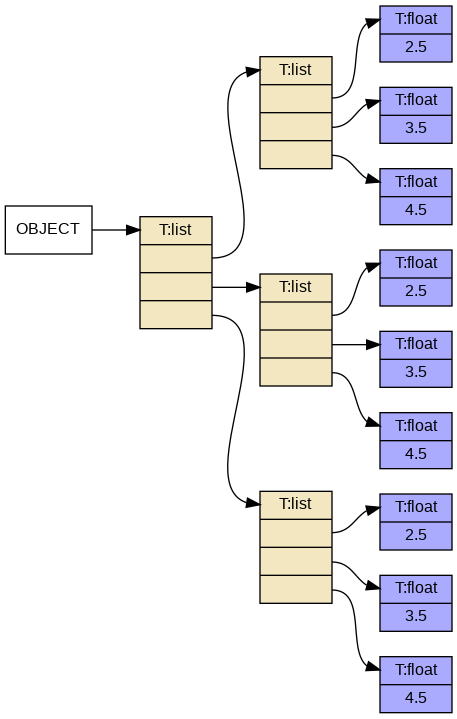

In [7]:
pygraph([[x + 1.5 for x in range(1, 4)] for _ in range(1, 4)])

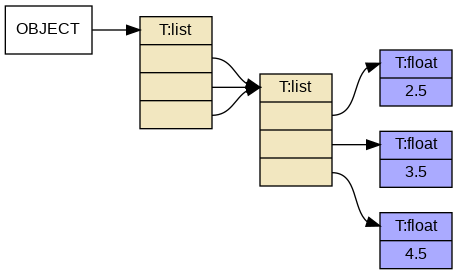

In [8]:
pygraph([[x + 1.5 for x in range(1, 4)]] * 3)